### SVM(Support Vector Machine)

- ML에서 오랫동안 연구되었고 성능이 좋은 모델
- DL보다 성능이 좋은 경우도 있음

In [80]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

### [1] 데이터 준비

In [81]:
digit = load_digits()

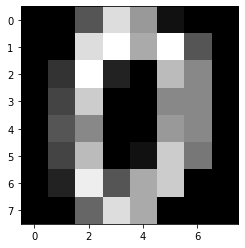

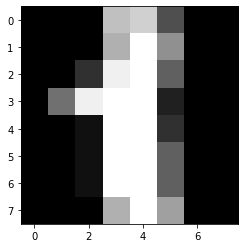

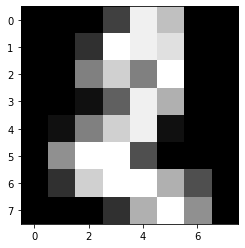

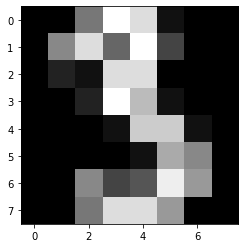

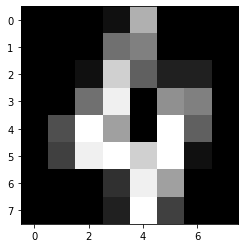

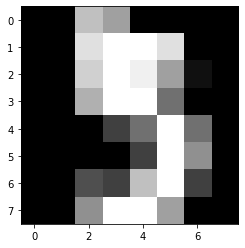

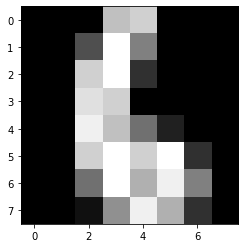

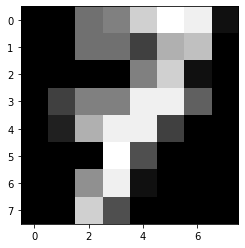

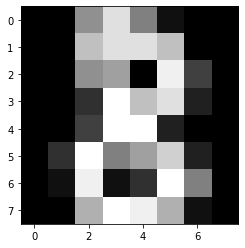

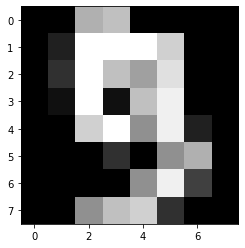

In [82]:
for i in range(0,10):
    plt.imshow(digit['images'][i])
    plt.gray()
    plt.show()

In [83]:
# data, target 분리
data = digit['data']
target = digit['target']

In [84]:
print(f'data : {data.shape}, target : {target.shape}')

data : (1797, 64), target : (1797,)


In [85]:
print(f'data[0] : {digit["data"][0]}')
print(f'images[0] : {digit["images"][0]}')

data[0] : [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
images[0] : [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


### [2] 학습용 & 테스트용

In [86]:
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                     random_state=42)

### [3] - 1 모델 생성 (로지스틱)

In [87]:
lr = LogisticRegression(max_iter=5000)

In [88]:
lr.fit(train_input, train_target)

LogisticRegression(max_iter=5000)

In [89]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

1.0
0.9733333333333334


### [4] - 1 예측 (로지스틱)

In [90]:
print(lr.predict([digit['data'][1]]))

[1]


In [91]:
digit['data'][7]

array([ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4.,
       11., 12.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,
        8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15., 15.,  4.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,
        1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.])

In [92]:
print(lr.predict([[ 0.,  0.,  7.,  8., 13., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
       0., 0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,
        0.,  0., 0., 0.,  6.,  0.,  0.,  2., 0., 0., 0.,  0.,  0.,
        0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 0.,
        0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]]))

[7]


### [3] - 2 모델  생성 (SVC) - target 변수가 카테고리형 >> 분류 모델인 SVC사용(SVR 회귀형 모델)
   

In [93]:
# model 학습
model = SVC().fit(train_input, train_target)
model

SVC()

In [94]:
model.score(train_input, train_target)

0.9962880475129918

In [95]:
model.score(test_input, test_target)

0.9866666666666667

### [4] - 2 예측 (SVC)

In [96]:
print(model.predict([digit['data'][4]]))

[4]


### [5] 성능 튜닝 ( 스케일링)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
# 훈련데이터에 대해 스케일링 적용을 위한 조사
scaler = MinMaxScaler()
scaler.fit(train_input)

# 훈련데이터에 대해 스케일링 적용
train_input_scaled = scaler.transform(train_input)

# 테스트데이터에 대해 스케일링 적용
test_input_scaled = scaler.transform(test_input)

In [99]:
# gamma 파라미저 조정
model = SVC(C=5, gamma=0.1).fit(train_input_scaled, train_target)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(train_input_scaled, train_target)))
print("테스트 세트 정확도: {:.3f}".format(model.score(test_input_scaled, test_target)))

훈련 세트 정확도: 0.999
테스트 세트 정확도: 0.991


### [6] 모델 . predict

In [100]:
print(model.predict(scaler.transform([digit['data'][7]])))

[7]


In [105]:
pred = model.predict(scaler.transform(digit['data']))

In [108]:
scaler.transform(digit['data'])

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [109]:
digit['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [106]:
import pandas as pd

In [107]:
pd.DataFrame(pred)

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


### C : 5 , gamma = 0.1 일때 정확도 가장 높음

In [167]:
#RBF 커널 SVM, C와 gamma 퍼러미터 사용
for thisGamma in [.1, .25, .5, 1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel="rbf", C=thisC, 
                   gamma=thisGamma).fit(train_input_scaled, train_target)
        m3train=model3.score(train_input_scaled,train_target)
        m3test=model3.score(test_input_scaled,test_target)
        print("RBF SVM : C:{}, gamma:{},training score:{:2f},test score:{:2f} \n".format(thisC, thisGamma, m3train, m3test))

RBF SVM : C:1, gamma:0.1,training score:0.996288,test score:0.986667 

RBF SVM : C:5, gamma:0.1,training score:0.999258,test score:0.991111 

RBF SVM : C:10, gamma:0.1,training score:1.000000,test score:0.988889 

RBF SVM : C:20, gamma:0.1,training score:1.000000,test score:0.988889 

RBF SVM : C:40, gamma:0.1,training score:1.000000,test score:0.988889 

RBF SVM : C:100, gamma:0.1,training score:1.000000,test score:0.988889 

RBF SVM : C:1, gamma:0.25,training score:0.997773,test score:0.988889 

RBF SVM : C:5, gamma:0.25,training score:1.000000,test score:0.991111 

RBF SVM : C:10, gamma:0.25,training score:1.000000,test score:0.991111 

RBF SVM : C:20, gamma:0.25,training score:1.000000,test score:0.991111 

RBF SVM : C:40, gamma:0.25,training score:1.000000,test score:0.991111 

RBF SVM : C:100, gamma:0.25,training score:1.000000,test score:0.991111 

RBF SVM : C:1, gamma:0.5,training score:1.000000,test score:0.988889 

RBF SVM : C:5, gamma:0.5,training score:1.000000,test score:0